In [1]:
# 데이터 불러오기
election <- read.csv("../Data/election_2022.csv")
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
서울특별시,종로구,129968,100629,46130,49172,3115
서울특별시,중구,111448,84998,38244,42906,2310
서울특별시,용산구,199077,152068,60063,85047,4374
서울특별시,성동구,252087,197240,84411,103880,5365
서울특별시,광진구,303582,235471,109922,113733,7072
서울특별시,동대문구,300928,232106,108171,112890,6416


In [2]:
tail(election)

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
243,경상남도,함양군,34459,26955,8526,16957,528
244,경상남도,산청군,31645,24913,7125,16607,464
245,경상남도,거창군,53049,41399,11963,27254,895
246,경상남도,합천군,39768,31270,6911,22742,511
247,제주특별자치도,제주시,408552,296826,157695,122084,10007
248,제주특별자치도,서귀포시,155802,112823,55435,50930,3591


In [3]:
str(election)

'data.frame':	248 obs. of  7 variables:
 $ 광역시도: Factor w/ 17 levels "강원도","경기도",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ 시군구  : Factor w/ 226 levels "가평군","강남구",..: 177 178 150 99 29 62 179 100 5 60 ...
 $ 선거인수: int  129968 111448 199077 252087 303582 300928 347108 375880 268974 281812 ...
 $ 투표수  : int  100629 84998 152068 197240 235471 232106 260862 292187 199448 216036 ...
 $ 이재명  : int  46130 38244 60063 84411 109922 108171 130381 142702 103333 106546 ...
 $ 윤석열  : int  49172 42906 85047 103880 113733 112890 118201 135044 86540 99780 ...
 $ 심상정  : int  3115 2310 4374 5365 7072 6416 6899 8952 5245 5605 ...


In [4]:
summary(election)

       광역시도      시군구       선거인수          투표수      
 경기도    :41   동구   :  6   Min.   :  8141   Min.   :  6653  
 서울특별시:25   중구   :  6   1st Qu.: 47672   1st Qu.: 39216  
 경상북도  :24   서구   :  5   Median :154354   Median :114654  
 경상남도  :22   남구   :  4   Mean   :176570   Mean   :136148  
 전라남도  :22   북구   :  4   3rd Qu.:265099   3rd Qu.:204189  
 강원도    :18   강서구 :  2   Max.   :703896   Max.   :542027  
 (Other)   :96   (Other):221                                    
     이재명           윤석열           심상정     
 Min.   :  1590   Min.   :  2052   Min.   :  109  
 1st Qu.: 17363   1st Qu.: 18223   1st Qu.:  709  
 Median : 48797   Median : 50341   Median : 2618  
 Mean   : 64479   Mean   : 65566   Mean   : 3216  
 3rd Qu.: 99831   3rd Qu.:101950   3rd Qu.: 5041  
 Max.   :285227   Max.   :275155   Max.   :13249  
                                                  

In [5]:
par(family = 'AppleGothic')
library(plotrix)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



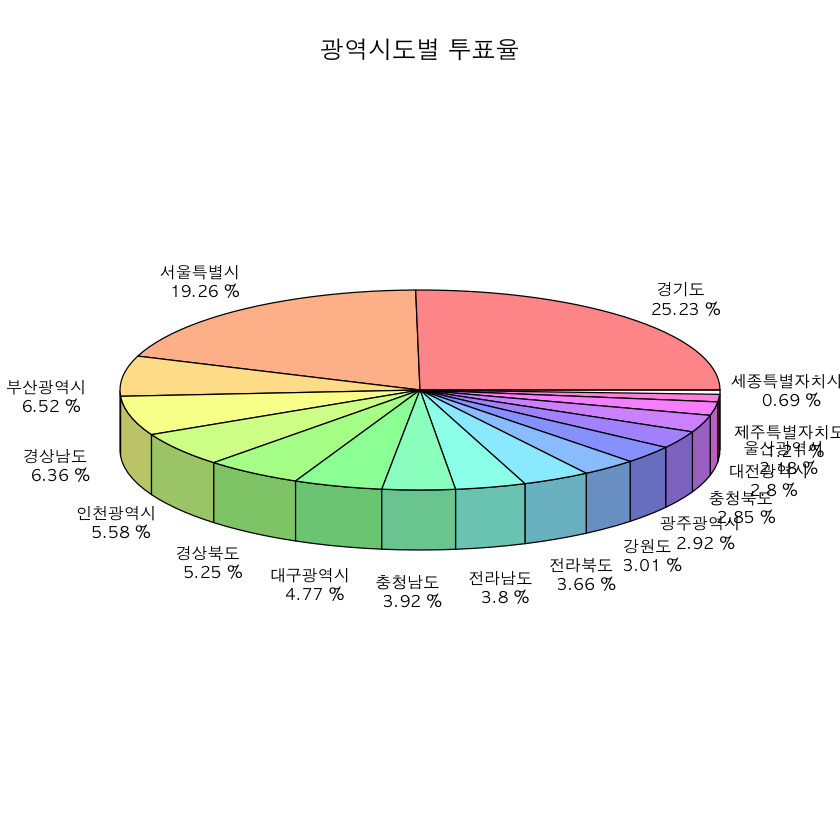

In [6]:
par(family = 'AppleGothic')
options(warn= -1)
electionD <- arrange(aggregate(투표수 ~ 광역시도, election, sum),desc(투표수))
ratio <- round((electionD$투표수 / sum(electionD$투표수) * 100),2)
label <- paste(electionD$광역시도, "\n", ratio, "%")

pie3D(electionD$투표수,
       main = "광역시도별 투표율",
       labels = label,
       labelcex = 0.8,
       col = rainbow(length(electionD$투표수), s = 0.4)
       )


In [7]:
# electionSum = 이재명 + 윤석열 + 심상정
election$electionSum <- apply(election[ ,5:7] , 1 , sum)
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
서울특별시,종로구,129968,100629,46130,49172,3115,98417
서울특별시,중구,111448,84998,38244,42906,2310,83460
서울특별시,용산구,199077,152068,60063,85047,4374,149484
서울특별시,성동구,252087,197240,84411,103880,5365,193656
서울특별시,광진구,303582,235471,109922,113733,7072,230727
서울특별시,동대문구,300928,232106,108171,112890,6416,227477


In [8]:
# electionRatio <- 투표수 대비 electionSum의 퍼센트 구해서 넣기 
election$electionRatio <- election$electionSum / electionD$투표수 * 100
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
서울특별시,종로구,129968,100629,46130,49172,3115,98417,1.155285
서울특별시,중구,111448,84998,38244,42906,2310,83460,1.283638
서울특별시,용산구,199077,152068,60063,85047,4374,149484,6.794036
서울특별시,성동구,252087,197240,84411,103880,5365,193656,9.020337
서울특별시,광진구,303582,235471,109922,113733,7072,230727,12.249881
서울특별시,동대문구,300928,232106,108171,112890,6416,227477,12.820777


In [9]:
# 3명의 후보를 가장 많이 선택한 지역과 가장 적게 선택한 지역 구하기

# 1)정렬 

arrange(election,desc(electionRatio))[1,]
arrange(election,desc(electionRatio))[nrow(election),]


광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
경기도,시흥시,424723,317197,178462,125544,7082,311088,134.1868


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
248,전라북도,진안군,22568,18855,15637,2572,264,18473,0.28412


In [10]:
# 2) subset
subset(election, electionRatio == max(election$electionRatio))
subset(election, electionRatio == min(election$electionRatio))

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
102,경기도,시흥시,424723,317197,178462,125544,7082,311088,134.1868


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
172,전라북도,진안군,22568,18855,15637,2572,264,18473,0.28412


In [11]:
# election_2022_job1.csv 로 저장하기
write.csv(election, "../Data/election_2022_job1.csv", row.names = F)

---

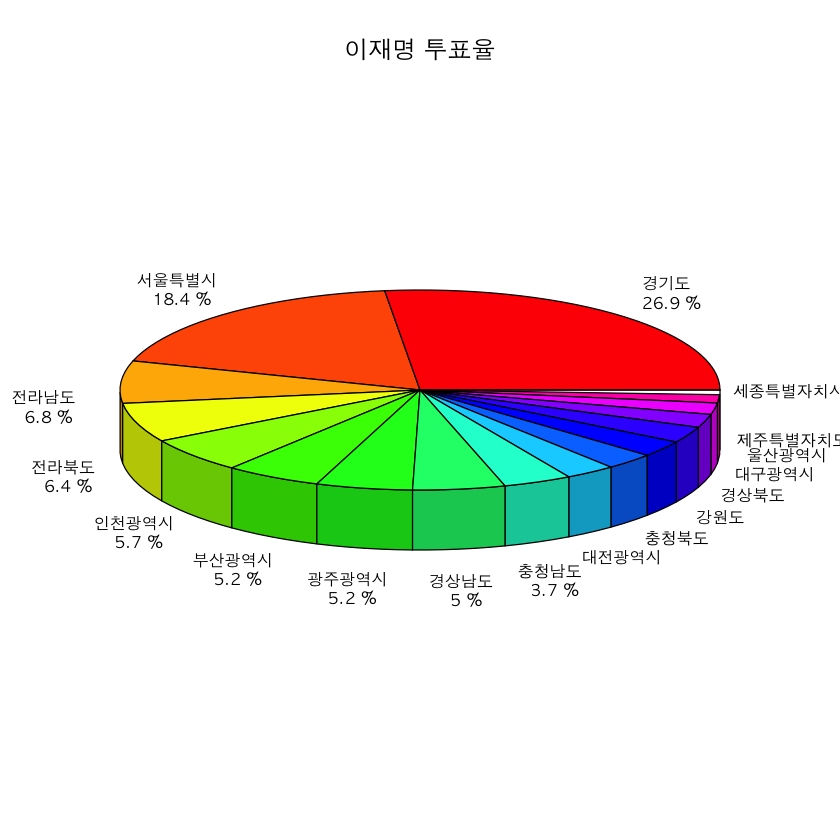

In [12]:
# 각 후보(윤석열, 이재명, 심상정)의 광역시도별 득표율을 3D Pie Chart로 표현하기
# 단, 득표율이 3% 미만인 광역시도는 명만 출력하고 퍼센트는 출력하지 않는다.
# 퍼센트 단위는 소수 한자리

# 이재명
par(family = 'AppleGothic')
options(warn= -1)
재명 <- arrange(aggregate(이재명 ~ 광역시도, election, sum),desc(이재명))
ratio <- round((재명$이재명 / sum(재명$이재명) * 100),1)
label <- ifelse(ratio>3,paste(재명$광역시도, "\n",ratio, "%"),paste(재명$광역시도))

pie3D(재명$이재명,
       main = "이재명 투표율",
       labels = label,
       labelcex = 0.8
       )



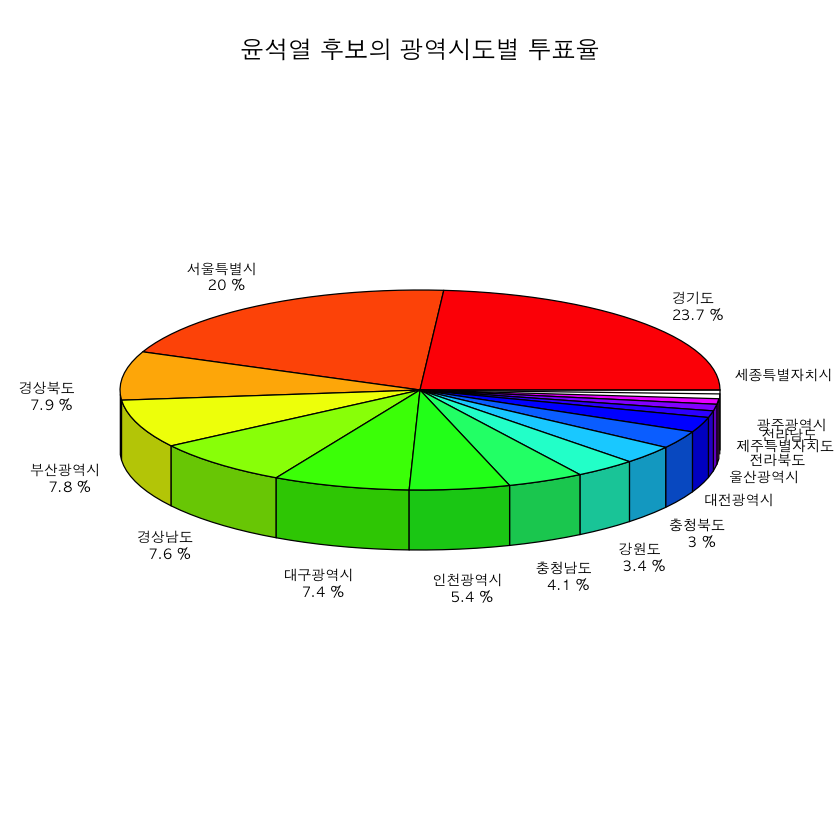

In [13]:
# 윤석열_투표율이라는 데이터프레임 생성하기

윤석열_투표율 <- aggregate(윤석열 ~ 광역시도, election, sum)
윤석열_투표율 <- arrange(윤석열_투표율,desc(윤석열))

# 윤석열 label
윤석열_ratio <- round((윤석열_투표율$윤석열/ sum(윤석열_투표율$윤석열) * 100),1)
윤석열_label <- paste(윤석열_투표율$광역시도,"\n",
                   ifelse(윤석열_ratio>=3,윤석열_ratio,''),
                   ifelse(윤석열_ratio>=3,'%',''))

# 3d pie chart
par(family = "AppleGothic")
options(warn=-1)
pie3D(윤석열_투표율$윤석열,
      main = "윤석열 후보의 광역시도별 투표율",
      labels = 윤석열_label,
      labelcex = 0.7
     )

[1] 797452

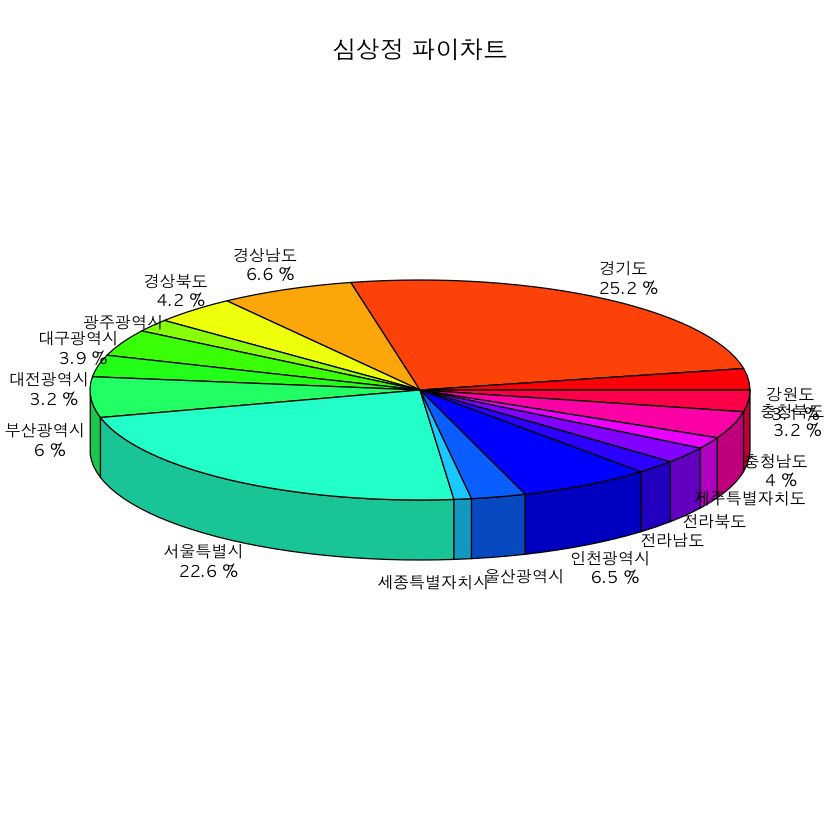

In [14]:
#label <- paste(week,"\n",ratio,"%")

sim <- aggregate(심상정 ~ 광역시도, election, sum)
vote <- aggregate(투표수 ~ 광역시도, election, sum)
sum(sim$심상정)
aaa <- (sim$심상정 / sum(sim$심상정)) *100

bbb <- cbind(vote)


par(family = 'AppleGothic')
week <- bbb$광역시도
options(warn = -1)
label <- paste(week,"\n",round(aaa,1),"%")
label2 <- paste(week)
pie3D(aaa,
    main = "심상정 파이차트",
    labelcex = 0.8,
    radius = 1.1,
    labels = ifelse(aaa>=3,label,label2)
   )

In [15]:
# 수도권(경기도, 서울, 인천)의 투표인구수의 퍼센트

paste(round(sum(arrange(aggregate(투표수 ~ 광역시도, election, sum),desc(투표수))[c(1,2,5),2])
      /sum(election$투표수)*100),"%")

[1] "50 %"

In [16]:
# 윤석열 후보의 서울득표 Top5를 구하고 나머지 지역은 기타로 합치기
par(family = 'AppleGothic')
options(warn= -1)

election_seoul <-election[election$광역시도 =="서울특별시",]
election_seoul_윤석열 <- arrange(election_seoul,desc(윤석열))[,c(2,6)]

#Ratio
election_seoul_윤석열_ratio <- 
        round(c(election_seoul_윤석열[1:5, 2], sum(election_seoul_윤석열[-c(1:5), 2])) 
        / sum(election_seoul_윤석열$윤석열) * 100 ,2)

A <- round(c(election_seoul_윤석열[1:5, 2], sum(election_seoul_윤석열[-c(1:5), 2])))

In [17]:
# Label 만들기
election_seoul_윤석열_label <-
paste(c(as.character(election_seoul_윤석열$시군구[1:5]),"기타"),'\n',election_seoul_윤석열_ratio,'%')

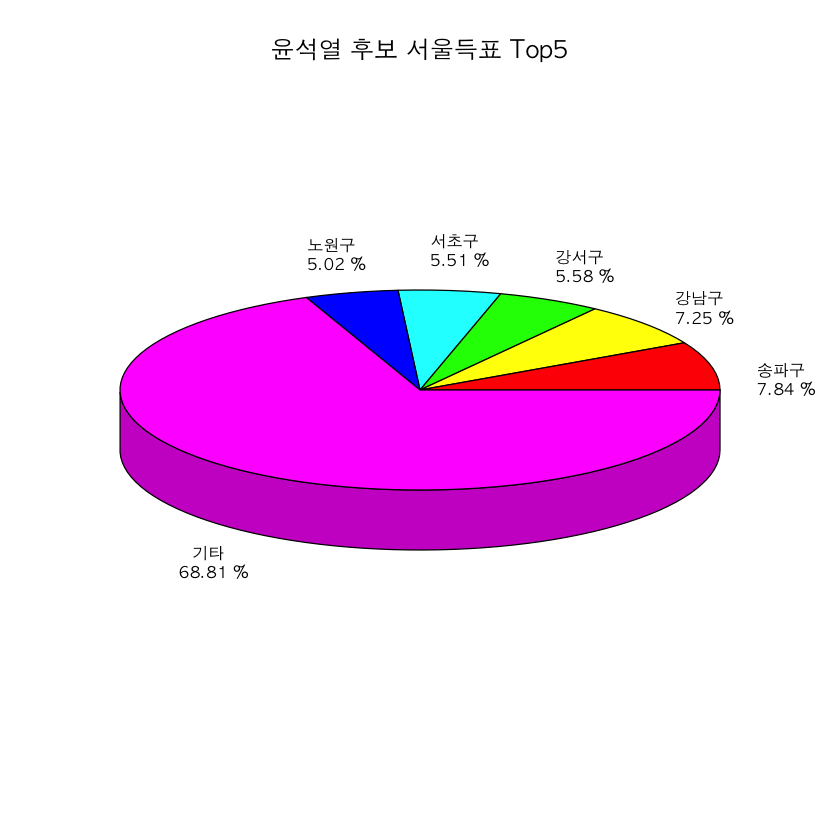

In [18]:
par(family = 'AppleGothic')
options(warn= -1)

pie3D(A, 
main = "윤석열 후보 서울득표 Top5",
labels= election_seoul_윤석열_label,
labelcex = 0.8
      
)

,투표수,이재명,윤석열,심상정,기타
8,292187,142702,135044,8952,5489


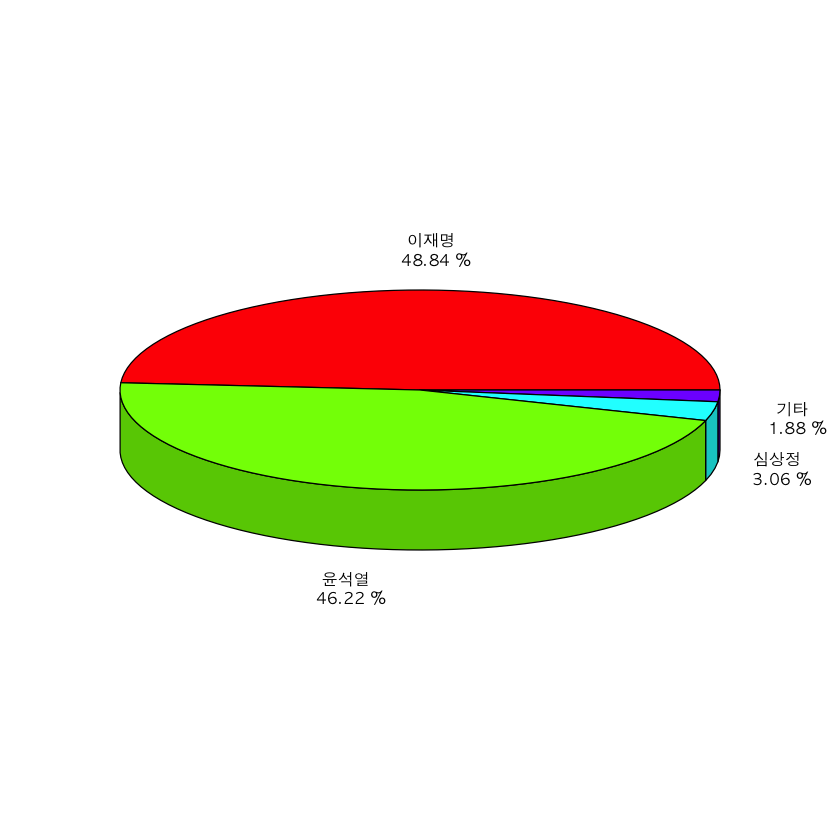

In [19]:
# 대선주자 출생지별 득표율 분석
# 윤석열 후보의 출생지는 서울특별시 성북구


par(family = 'AppleGothic')
options(warn= -1)

성북 = subset(election, 시군구 == "성북구")[,4:7]
성북$기타 = 성북$투표수 - sum(성북[,2:4])
성북
mat = as.numeric(성북[,2:5])

label <- paste(colnames(성북[,2:5]), '\n', round(성북[,2:5]/sum(성북[,2:5])*100,2), '%')

pie3D(
    mat,
    labels = label,
    labelcex = 0.8
)


---
# 투표수가 가장 많은 4지역(광역시도)의 후보별 득표수 차이를 막대그래프로 시각화

In [20]:
election

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
서울특별시,종로구,129968,100629,46130,49172,3115,98417,1.155285
서울특별시,중구,111448,84998,38244,42906,2310,83460,1.283638
서울특별시,용산구,199077,152068,60063,85047,4374,149484,6.794036
서울특별시,성동구,252087,197240,84411,103880,5365,193656,9.020337
서울특별시,광진구,303582,235471,109922,113733,7072,230727,12.249881
서울특별시,동대문구,300928,232106,108171,112890,6416,227477,12.820777
서울특별시,중랑구,347108,260862,130381,118201,6899,255481,15.853497
서울특별시,성북구,375880,292187,142702,135044,8952,286698,21.643139
서울특별시,강북구,268974,199448,103333,86540,5245,195118,15.217819
서울특별시,도봉구,281812,216036,106546,99780,5605,211931,17.157460


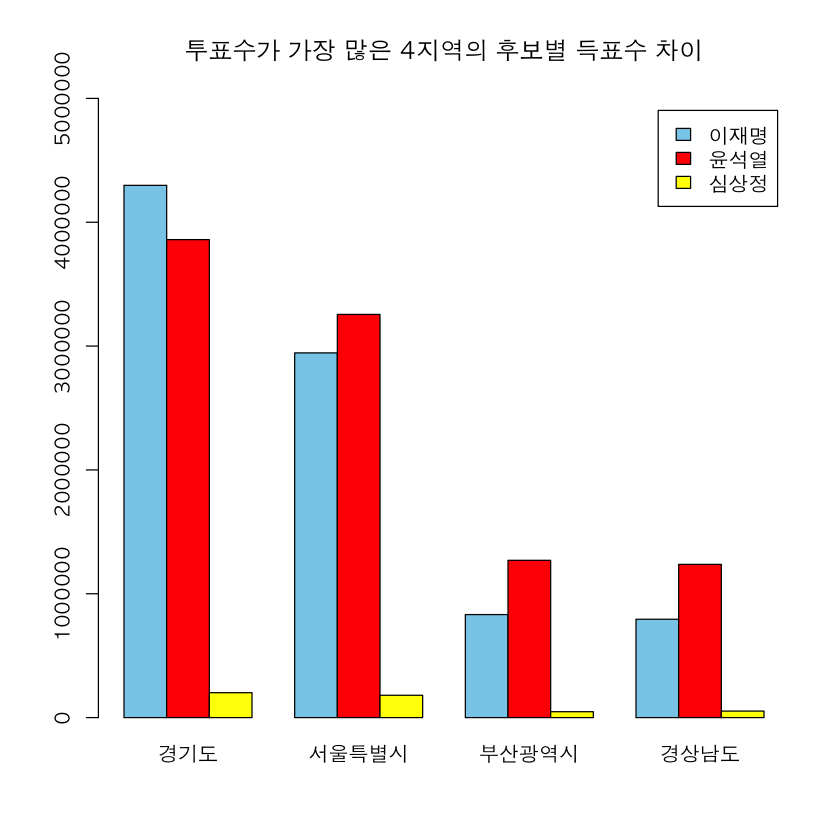

In [21]:
par(family = 'AppleGothic')
options(scipen = 100)
투표수 <- election[,c(1,5:7)]
best1 <- subset(투표수, 광역시도 == c("경기도"))
best2 <- subset(투표수, 광역시도 == c("서울특별시"))
best3 <- subset(투표수, 광역시도 == c("부산광역시"))
best4 <- subset(투표수, 광역시도 == c("경상남도"))

best1 = t(apply(best1[,2:4] , 2 , sum))
best2 = t(apply(best2[,2:4] , 2 , sum))
best3 = t(apply(best3[,2:4] , 2 , sum))
best4 = t(apply(best4[,2:4] , 2 , sum))

best <- rbind(best1,best2,best3,best4)
rownames(best) <- c("경기도","서울특별시","부산광역시","경상남도")
best <- t(best)

barplot(best,
        beside = T, # 누적된 막대의 해체
        ylim = c(0,5000000),
        legend.text = T,
        main = "투표수가 가장 많은 4지역의 후보별 득표수 차이",
        col = c('skyblue','red','yellow')
       )

---
# 투표수 높은 시군구의 후보별 득표수를 막대그래프로 시각화

[1] "경기도 화성시"     "경기도 부천시"     "경기도 남양주시"  
[4] "서울특별시 송파구" "서울특별시 강서구"

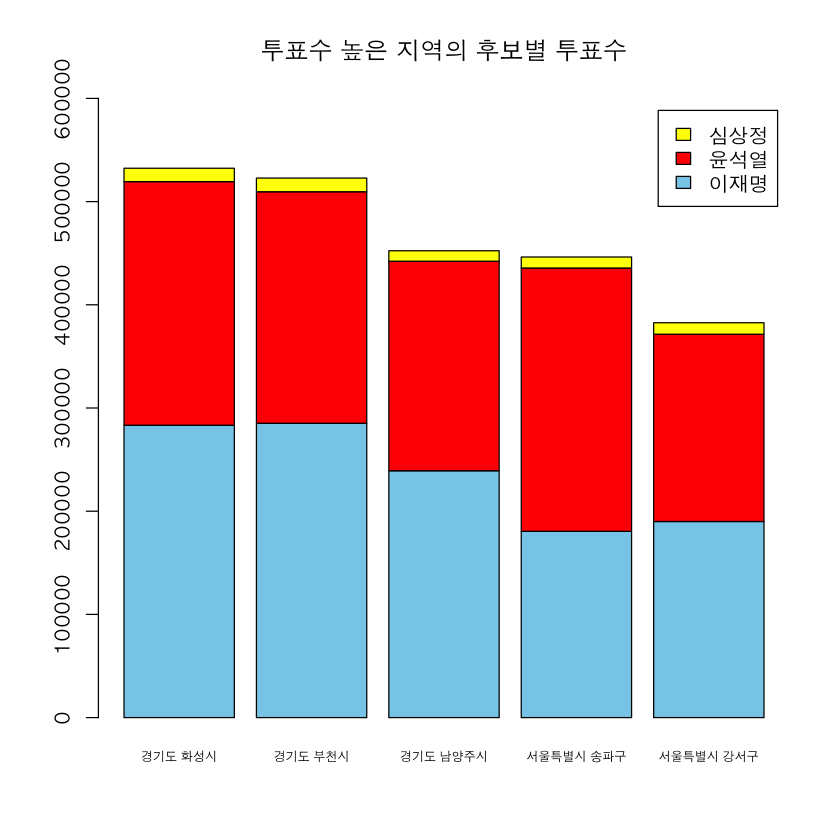

In [22]:
par(family = 'AppleGothic')
지역best <- arrange(election,desc(투표수))[1:5,c(1,2,5:7)]
지역best$지역 <- paste(지역best$광역시도,지역best$시군구)
name <- 지역best[,6]
name
지역best <- t(as.matrix(지역best[,3:5]))

barplot(지역best,
        ylim = c(0,600000),
        legend.text = T,
        names = name,
        cex.names = 0.6,
        main = "투표수 높은 지역의 후보별 투표수",
        col = c('skyblue','red','yellow')

)



# 20대 대선 권역별 후보 득표율
#### : 20대 대선 권역별 후보 득표율을 꺽은선 그래프로 표현하시오.

In [23]:
수도권 <- c('서울특별시','인천광역시','경기도')
강원권 <- '강원도'
영남권 <- c('경상북도','경상남도','대구광역시','부산광역시','울산광역시')
충청권 <- c('충청북도','충청남도','세종특별자치시','대전광역시')
호남권 <- c('전라남도','전라북도','제주특별자치도','광주광역시')

election$권역별 <- ifelse(election$광역시도 %in% 수도권,'수도권',
                  ifelse(election$광역시도 %in% 강원권,'강원권',
                  ifelse(election$광역시도 %in% 영남권,'영남권',
                  ifelse(election$광역시도 %in% 충청권,'충청권','호남권'
                  ))))
권역별투표 <- election[,c(4:7,10)]
권역별투표 <- aggregate(cbind(투표수,이재명,윤석열,심상정)~권역별,권역별투표,sum)
권역별투표

권역별,투표수,이재명,윤석열,심상정
강원권,1015458,419644,544980,25031
수도권,16904189,8156232,7993973,433289
영남권,8468363,2686576,5382549,185678
충청권,3464133,1573443,1719055,89261
호남권,3912521,3154923,619883,64193


In [24]:
이재명<- 권역별투표[,3]/권역별투표$투표수*100
윤석열<- 권역별투표[,4]/권역별투표$투표수*100
심상정<- 권역별투표[,5]/권역별투표$투표수*100

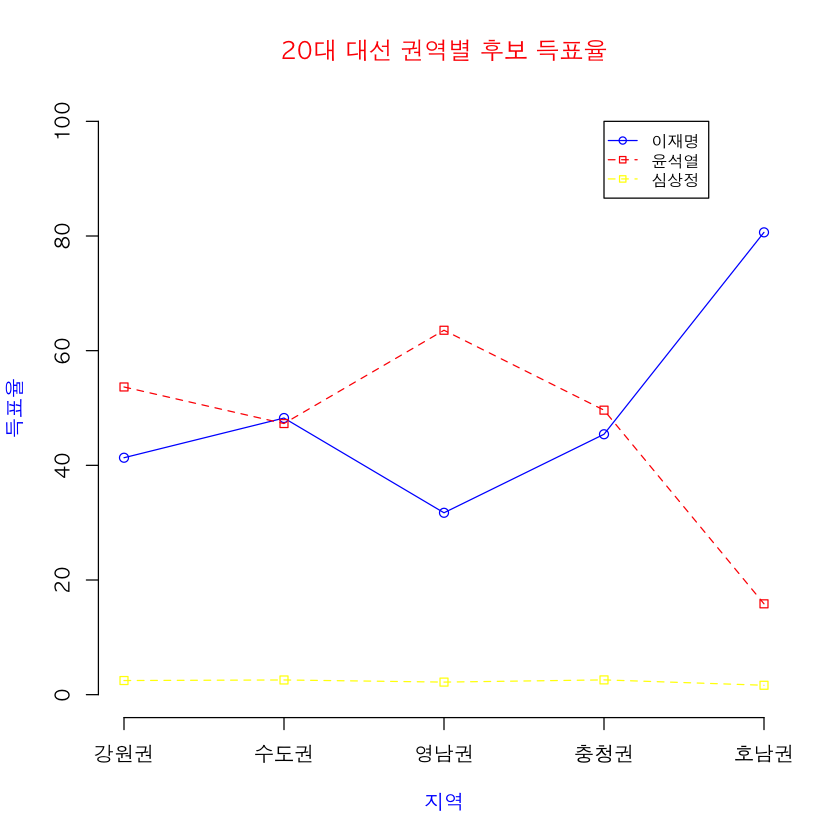

In [25]:
par(family = 'AppleGothic')
plot(이재명,
     type = "o",
     col = "blue",
     ylim = c(0, 100),
     axes = F, # x,y좌표 frame 제거
     ann = F # x,y의 label 제거
     )
# x축과 x축의 라벨을 설정
axis(1, at =1:5, lab=권역별투표$권역별) # axis()는 축만드는 함수
# y축과 y축의 라벨을 설정
axis(2, ylim = c(0,100))

# main title 지정 따로빼서 쓰면 컬러값을 줄 수가 있어서 그럼
title(main="20대 대선 권역별 후보 득표율", col.main = "red")

# x축 title(label) 지정
title(xlab = "지역", col.lab = "blue")

# y축 title(label) 지정
title(ylab = "득표율", col.lab = "blue")

# 선그리기 함수로 def 그리기
lines(윤석열,
     type = "o",
     pch = 22, # 사각형으로 보인다.
     col = "red",
     lty = 2
     )

# 선그리기 함수로 ghi 그리기
lines(심상정,
      type= 'o', 
      pch = 22,
      col = 'yellow',
      lty = 2
     )

# 범례 legend를 써줘야됨
legend(4, 100, #x,y좌표
       c("이재명","윤석열","심상정"),
    col = c("blue","red","yellow"),
    pch = c(21,22,22),
    lty = c(1,2,2),
    cex = 0.8 # 크기부여 기본값이 1임
    )

---
# 4조

,1,17
이재명,84.23,52.03
윤석열,12.63,42.23
심상정,1.51,3.32
기타,1.63,2.42


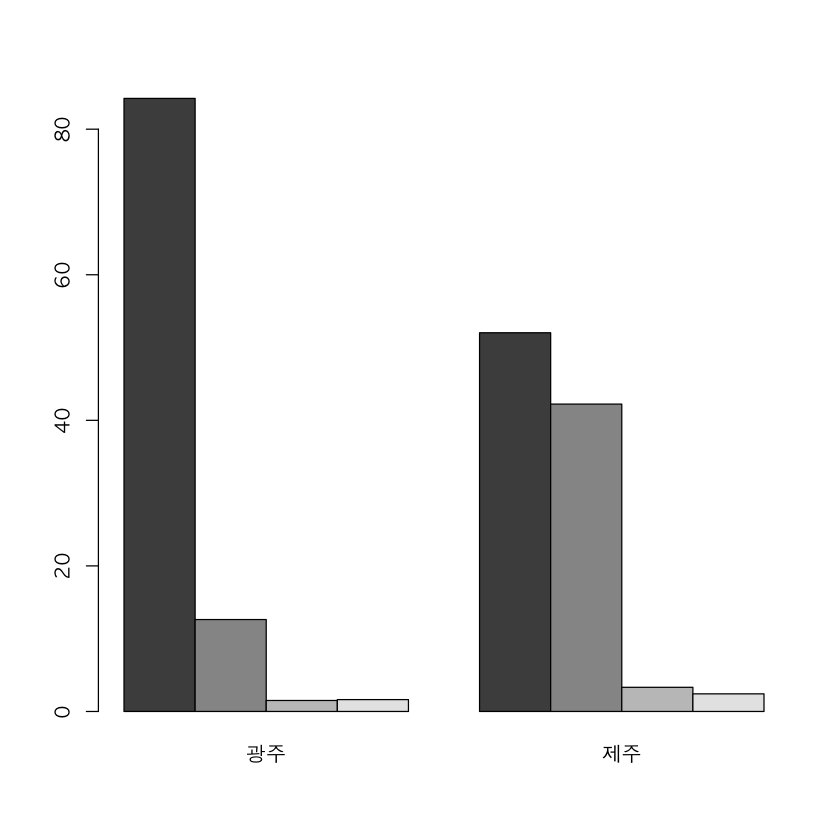

In [26]:
par(family = 'AppleGothic')
투표율 <- aggregate(cbind(선거인수,투표수,이재명,윤석열,심상정)~광역시도,election,sum)
투표율$투표율 <-  round(투표율$투표수 / 투표율$선거인수 *100)
최대최저 <- arrange(투표율,desc(투표율))
최대최저 <- 최대최저[c(1,17),]
최대최저$기타 <- 최대최저[,3]-apply(최대최저[,c(4:6)], 1,sum)
d <- t(as.matrix(round((최대최저[,c(4,5,6,8)]/최대최저[,3])*100,2)))
d
barplot(d,
        beside = T,
        names = c("광주","제주")
        )

---
# 2조

In [27]:
시군구투표율 <- election[,c(1,2,4,5,6)]
시군구투표율$이재명투표율 <- 시군구투표율$이재명 / 시군구투표율$투표수 *100
시군구투표율$윤석열투표율 <- 시군구투표율$윤석열 / 시군구투표율$투표수 *100

시군구투표율$이재명투표율 <- ifelse(시군구투표율$이재명투표율 > 50, 1,0)
시군구투표율$윤석열투표율 <- ifelse(시군구투표율$윤석열투표율 > 50, 1,0)
시군구num <- aggregate(cbind(이재명투표율,윤석열투표율)~광역시도,시군구투표율,sum)
시군구num

이재명<-시군구num[,2]
윤석열<-시군구num[,3]

광역시도,이재명투표율,윤석열투표율
강원도,0,18
경기도,19,7
경상남도,0,20
경상북도,0,24
광주광역시,5,0
대구광역시,0,8
대전광역시,0,1
부산광역시,0,16
서울특별시,3,8
세종특별자치시,1,0


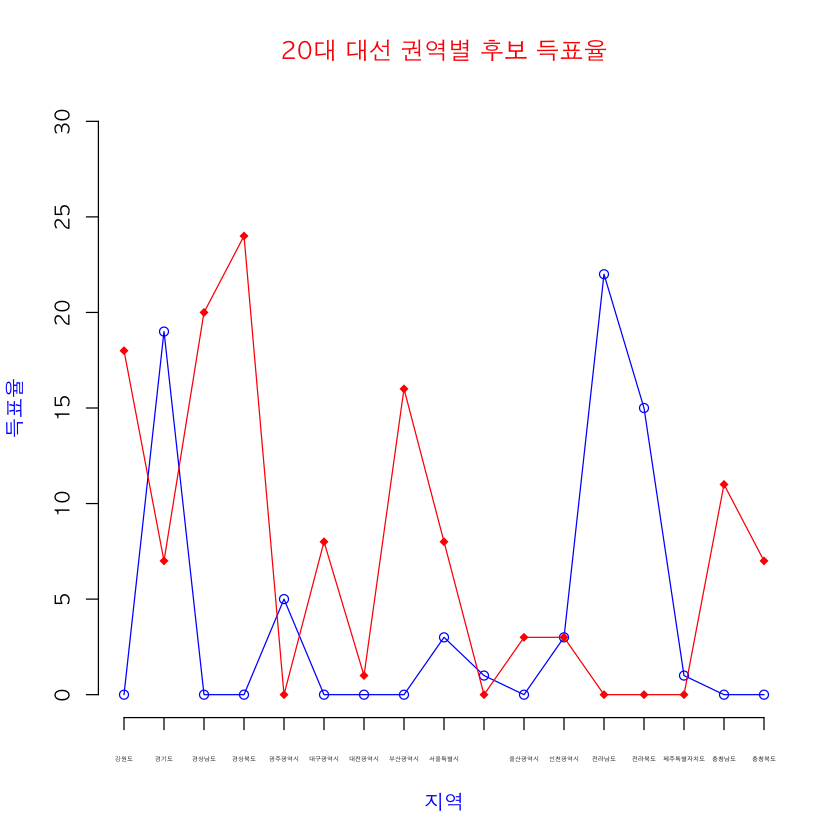

In [28]:
par(family = 'AppleGothic')
plot(이재명,
     type = "o",
     col = "blue",
     ylim = c(0, 30),
     axes = F, # x,y좌표 frame 제거
     ann = F # x,y의 label 제거
     )
# x축과 x축의 라벨을 설정
axis(1, at =1:17, lab=시군구num$광역시도, cex.axis = 0.3) # axis()는 축만드는 함수
# y축과 y축의 라벨을 설정
axis(2, ylim = c(0,30))

# main title 지정 따로빼서 쓰면 컬러값을 줄 수가 있어서 그럼
title(main="20대 대선 권역별 후보 득표율", col.main = "red")

# x축 title(label) 지정
title(xlab = "지역", col.lab = "blue")

# y축 title(label) 지정
title(ylab = "득표율", col.lab = "blue")

# 선그리기 함수로 def 그리기
lines(윤석열,
     type = "o",
     pch = 18, # 사각형으로 보인다.
     col = "red",
     lty = 1
     )




---
# 우리조

지역,선거인수,투표수,이재명,윤석열,심상정,ratio,이ratio,윤ratio,심ratio
호남권,4887963,3912521,3154923,619883,64193,80.04,80.64,15.84,1.64
영남권,10993369,8468363,2686576,5382549,185678,77.03,31.72,63.56,2.19
수도권,21971908,16904189,8156232,7993973,433289,76.94,48.25,47.29,2.56
강원권,1333621,1015458,419644,544980,25031,76.14,41.33,53.67,2.46
충청권,4602633,3464133,1573443,1719055,89261,75.26,45.42,49.62,2.58


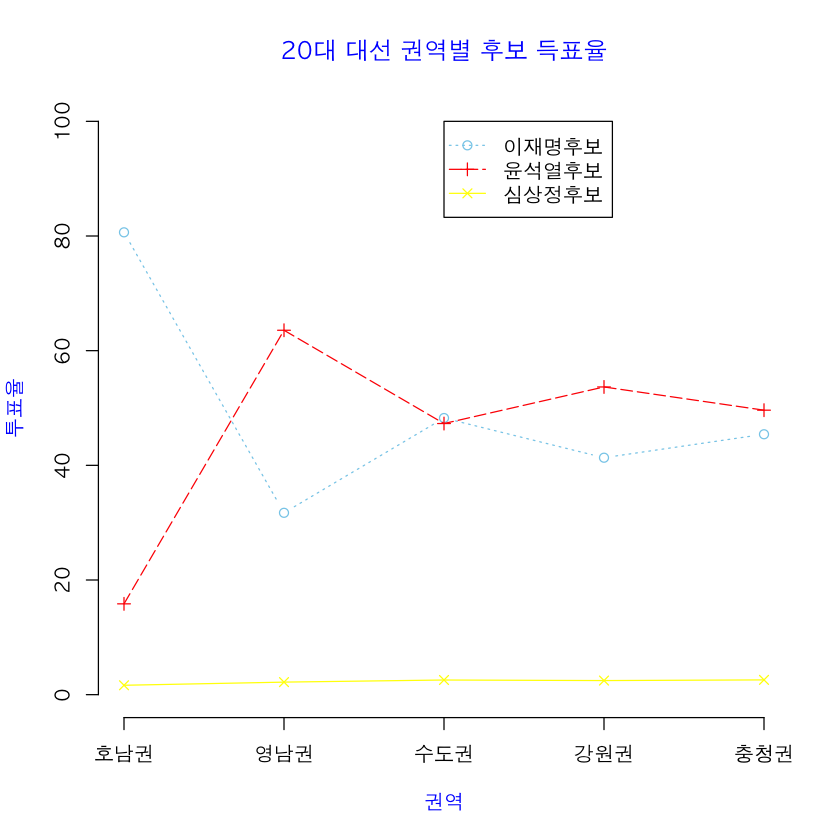

In [29]:
par(family="AppleGothic")
수도권 <-c('서울특별시','인천광역시','경기도')
강원권 <-'강원도'
영남권 <- c('경상북도','경상남도','대구광역시','부산광역시','울산광역시')
충청권 <- c('충청북도','충청남도','세종특별자치시','대전광역시')
호남권 <- c('전라남도','전라북도','제주특별자치도','광주광역시')

election$지역 <- ifelse(election$광역시도 %in% 수도권,'수도권',
               ifelse(election$광역시도 %in% 강원권,'강원권',
                     ifelse(election$광역시도 %in% 영남권,'영남권',
                           ifelse(election$광역시도 %in% 충청권,'충청권','호남권'))))
elec1 <- aggregate(cbind(선거인수,투표수,이재명,윤석열,심상정)~지역,election,sum)
elec1$ratio <- round(elec1$투표수/elec1$선거인수*100,2)
elec1$이ratio <- round(elec1$이재명/elec1$투표수*100,2)
elec1$윤ratio <- round(elec1$윤석열/elec1$투표수*100,2)
elec1$심ratio <- round(elec1$심상정/elec1$투표수*100,2)
arrange(elec1,desc(ratio))
elec2 <- t(arrange(elec1,desc(ratio))[1:5,7:10])
colnames(elec2)=c('호남권','영남권','수도권','강원권','충청권')
이 <- elec2[2,]
윤 <- elec2[3,]
심 <- elec2[4,]
plot(이,
     type ="b",
     ylim=c(0,100),
     axes=F,
     ann=F,
     col="sky blue",
     lty=3
    )
legend(3,100,
      c("이재명후보","윤석열후보","심상정후보"),
      col=c("sky blue","red","yellow"),
      pch=c(21,3,4),
      lty=c(3,5,1)
      )
title(main="20대 대선 권역별 후보 득표율", col.main="blue")
title(xlab="권역", col.lab="blue")
title(ylab="투표율", col.lab="blue")
axis(1,at=1:5,lab=c('호남권','영남권','수도권','강원권','충청권'))
axis(2,ylim=c(0,100))
lines(윤,
      type="o",
      pch=3,
      col="red",
      lty=5
     )
lines(심,
      type="o",
      pch=4,
      col="yellow",
      lty=1
     )

---
# 1조

시군구,오차합
유성구,1.59
미추홀구,1.87
동구,1.98
대덕구,2.04
청주시흥덕구,2.30


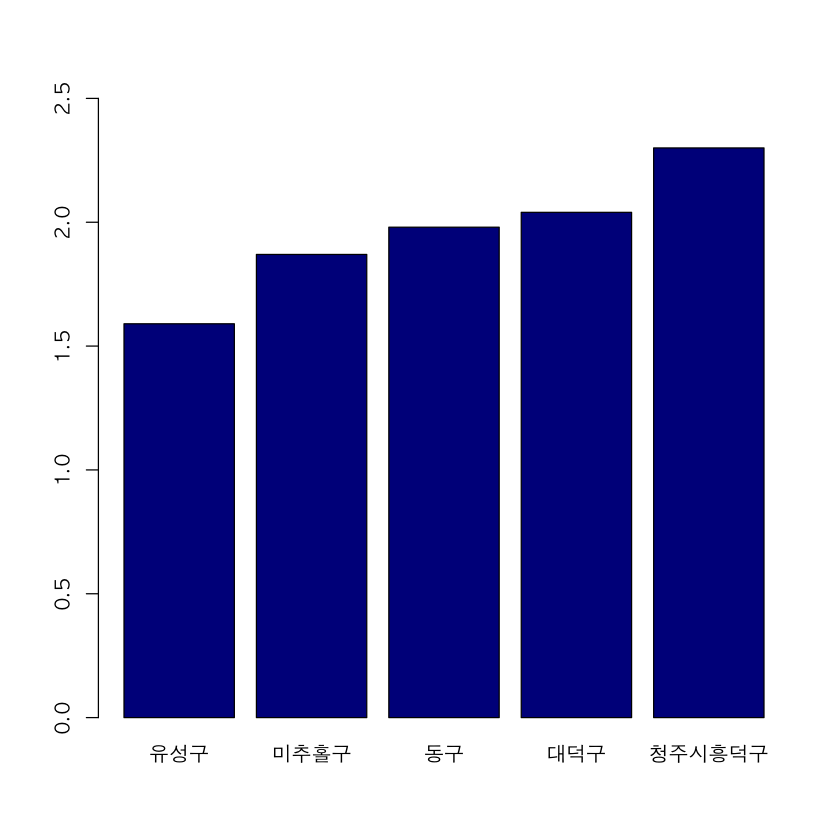

In [30]:
election <- read.csv("../Data/election_2022.csv")
par(family="AppleGothic")

election$이재명투표율 <- round(election$이재명 / election$투표수*100,2)
election$윤석열투표율 <- round(election$윤석열 / election$투표수*100,2)
election$심상정투표율 <- round(election$심상정 / election$투표수*100,2)
election$이재명 <- abs(election$이재명투표율 - 47.83)
election$윤석열 <- abs(election$윤석열투표율 - 48.56)
election$심상정 <- abs(election$심상정투표율 - 2.37)
election$오차합 <- election$이재명 + election$윤석열 + election$심상정

똥 <- subset(election, 이재명<=1 & 윤석열<=1 & 심상정<=1 & 이재명투표율<윤석열투표율)
똥 <- arrange(똥, 오차합)[,c(2,11)]
똥

barplot(
    똥[,2],
    names = 똥[,1],
    ylim = c(0,2.5),
    col = 'darkblue'
)

In [31]:
election$이재명투표율 <- round(election$이재명 / election$투표수*100,2)
election$윤석열투표율 <- round(election$윤석열 / election$투표수*100,2)
election$심상정투표율 <- round(election$심상정 / election$투표수*100,2)
election_투표율 <- election[,-c(1,3:11)]

a <- subset(election_투표율,election_투표율$윤석열투표율-election_투표율$이재명투표율>0 )
b <- subset(a,46.83< a$이재명투표율 & 48.83 > a$이재명투표율)

이재명오차 <- round(abs(b$이재명투표율-47.83),1)
윤석열오차 <- round(abs(b$윤석열투표율-48.56),1)
심상정오차 <- round(abs(b$심상정투표율-2.37),1)

오차sum <-cbind(이재명오차,윤석열오차,심상정오차)
apply(오차sum[,1:3],sum)

ERROR: Error in election_투표율$윤석열투표율: $ operator is invalid for atomic vectors
